# Classical Statistical Tests: Hypothesis Testing

## 1. Introduction

##### Hypothesis
> a statement about a population parameter

Examples:
- is the mean value consistent with zero?
- is the random variable normally distributed?

##### Null ($H_0$) hypothesis and alternative ($H_1$) hypothesis
> two complementary hypotheses - a hypothesis test points at one of them

Example:
- $H_0$: mean value $\mu = 0$
- $H_1$: $\mu \neq 0$

##### Hypothesis testing
> to decide whether a hypothesis is *true* or *not*, based on empirical data

##### Test statistic
> quantity which is constrained for a given hypothesis test and confidence level

### 1.1. Null and alternative hypotheses
Usually, we use *null* to denote the simplest hypothesis. E.g. when testing if the there is a peak in a signal, the null hypothesis is:

> $H_0$: there is no peak - the data are explained as random fluctuations

The alternative hypothesis is the one for which we require overwhelming evidence. For example, when testing the General Relativity through Gravitational Wave observations, then

> $H_0$: the data is consistent with GR

> $H_1$: the data is not consistent with GR

Most tests are designed to directly test whether $H_0$ holds. Also, in Statistics we want to highlight the fact that there is an uncertainty in any hypothesis test - we must be careful when stating results. Therefore, the two outcomes are commonly phrased as:

1. **we do not reject $H_0$** instead of *we accept $H_0$*
2. **we reject $H_0$** instead of *we accept $H_1$*

### 1.2. Type I and II errors

In statistics, there is always a probability of a spurious result. This is why we quantify uncertainties, or in the case of hypothesis tests, the probability of wrong conclusions. There are two types of errors in hypothesis testing:

* Probability of Type I error: $\alpha$ or **significance level**
* Probability of Type II error: $\beta$ or **statistical power**

| Truth \ Decision | Do not reject $H_0$ | Reject $H_0$  |
|------------------|---------------------|---------------|
|   **$H_0$**      | Correct             | Type I error  |
|   **$H_1$**      | Type II error       | Correct       |

Because in most hypothesis tests $\beta$ is harder to quantify and Type I errors are considered more dangerous, the experimeneters tend to pick a small value for $\alpha$ to reach into a conclusion.

For example, in a particle acceleration experiment we may require $a = 0.000001$ for the detection of new particles.

**The probability for Type I/II errors depend on the data at hand and the design of the test. Changing the latter may eliminate or significantly reduce the probability for a Type I or Type II error, but you cannot do both!**

### 1.3. $p$-values
We do not have to choose between the hypotheses - we may leave the decision to the reader. So, instead of setting value for $\alpha$ and reporting an outcome, we provide a $p$-value: the probability for $H_0$ based on our current sample.

For example, we have observed a field containing an open cluster. Each star detection may be a signal from an existing star or a random fluctuation of the background. We can give to the community a table of all detections with a $p$-value for each one of them. Here $H_0$ is *the values of the pixels are a background fluctuation*.

Now, a researcher has downloaded the table and is interested in the spatial distribution of stars. As they require a large, complete sample, they may not be very conservative and select all stars with $p < 0.05$. This is a risk because you risk *contamination*, but in principle, you can run the analysis for various $p$-value cuts!

Another researcher might want to study the spectral properties of the stars in the open cluster. Though, spectroscopic observations require more time and money. To avoid observing the background, only bona fide targets are selected: e.g. $p < 0.0001$.

## 2. Example: Z-test

### 2.1. A theoretical prediction...

A theoretical model for the formation of globular clusters (GCs) in spiral galaxies predicts that their absolute magnitude in the near infrared K-band is normally distributed with mean value equal to $-10.2\ \rm mag$ and standard deviation $1.5\ \rm mag$.

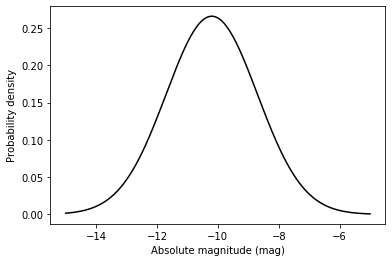

In [113]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

# parameters of the distribution of height of men in a country
model_mean = -10.2
model_std = 1.5

# plot the distribution
x = np.linspace(-15.0, -5.0, 200)
y = st.norm.pdf(x, loc=model_mean, scale=model_std)
plt.plot(x, y, "k-")
plt.xlabel("Absolute magnitude (mag)")
plt.ylabel("Probability density")
plt.show()

### 2.2. Empirical data...

From a survey of Milky Way globular clusters [1], we get the absolute magnitudes for 81 GCs.

Loaded 81 globular cluster absolute magnitudes for the Milky Way


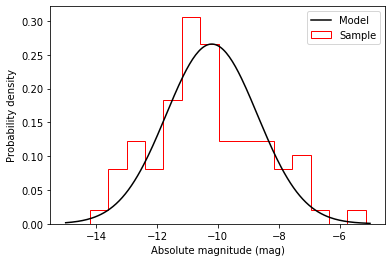

In [114]:
# Load Milky Way globular cluster absolute magnitudes
absolute_MWG = np.loadtxt("GC_MWG_absolute.dat")
N_MWG = len(absolute_MWG)
print("Loaded", N_MWG, "globular cluster absolute magnitudes for the Milky Way")

plt.figure()
plt.plot(x, y, "k-", label="Model")
plt.hist(absolute_MWG, bins=15, histtype="step", color="r", density=True, label="Sample")
plt.xlabel("Absolute magnitude (mag)")
plt.ylabel("Probability density")
plt.legend()
plt.show()

### 2.3. Agreement between model and sample
The model seems to agree with the observations but in science we need to quantify such aggrements. To test it without bias, we forget about the data, and design a hypothesis test. Then we apply the test on the data and report the outcome.

#### Step 1. We define the null hypothesis

> $H_0$: the mean value of the absolute magnitude of the Milky Way GCs is consistent with model

#### Step 2. We decide a significance level

We decide a significance level of $5\%$. This value is commonly used in many scientific disciplines (medicine, psychology, etc.) Therefore,

> $a = 0.05$

This is the lower limit on the probability at which the Type I error is allowed to occur. If the probability is lower, then we reject the null hypothesis.

#### Step 3. The statistic

For $N$ observations $x_i$ the sample mean, $\bar{x}$ is

$$\bar{x} = \sum\limits_{i=1}^{N} x_i$$

For normally distributed observations, $x_i \sim \mathcal{N}(\mu, \sigma)$, it is known that the sample mean is also normally distributed with population mean ($\mu$) and standard deviation equal to the standard deviation of the population ($\sigma$), devided by the square root of the size of the sample ($N$):

$$\bar{x} \sim \mathcal{N}\left(\mu, \frac{\sigma}{\sqrt{N}}\right)$$

This standard deviation is also called *standard error of the mean*:

$${\rm SE} = \frac{\sigma}{\sqrt{N}}$$

Therefore the probability density function (PDF) of the sample mean is:

$$f(\bar{x}) = \frac{1}{\sqrt{2\pi \ \rm SE^2}} \exp\left[-\frac{\left(\bar{x} - \mu\right)^2}{2 \ \rm SE^2}\right]$$

Because of the ability to shift and scale the normal distribution, the quantity

$$ Z = \frac{\bar{x} - \mu}{\rm SE} $$

follows the standard normal distribution (i.e. mean value $0$ and standard deviation $1$):

$$ f(Z) = \frac{1}{\sqrt{2\pi}} e^{-\frac{1}{2}Z^2}$$

Therefore, by just computing the $Z$ *score* of our sample, $z$, we can easily use tables for the normal distribution or Python code to quickly compute the probability at which $Z$ is below or above a specific value.

We call this value $Z$ *statistic* or *score* and it used whenever the quantity is normally distributed.

#### Step 4. p-value or, critical value for the statistic

Because of the null hypothesis, we must convert the statement "*consistent with...*" to a mathematical statement. In this example, we can consider that the sample mean is inconsistent with the model prediction if its significantly lower or higher. Therefore, the Type I error is equal to probability that the $Z$ score deviates more than the absolute deviation of the score for the sample at hand:

$$ p = P(Z > |z|) + P(Z < -|z|) $$

Using the symmetry of normal distribution's PDF and the fact that $P({\rm A}) + P({\rm not A}) = 1$, we arrive at

$$ p = \cdots = 2 \left(1 - P(Z < |z|)\right) = \cdots = 2 P(Z < -|z|)$$

or simply,

$$ p = 2 \Phi(-|z|) $$

where $\Phi(z)$ is the CDF of the standard normal distirbution.

If we find $p < a = 0.05$ then we reject the null hypothesis.

Alternatively, we can set **critical** values of the $Z$ score that corresponds to the significance level. As rejection should occur either for higher or lower values (two-tail test), we find two critical values, one for each tail, corresponding to $a/2$ probability:

$$ Z_{\rm crit,1} = \Phi^{-1}\left(\frac{a}{2}\right) = -1.96 $$

$$ Z_{\rm crit,2} = \Phi^{-1}\left(1 - \frac{a}{2}\right) = +1.96 $$

Because of the symmetry of the normal distribution we could also compute a critical value for the absolute $Z$ score: *how many **sigmas** away the measured value can be from the model prediction*:

$$ |Z|_{\rm crit} = 1.96 $$


#### Step 5. Decision

Now that we defined all the steps, we can apply it on the data. In the following code, we plot the sample, compute the statistic and print the outcome based on the critical value! Alternatively we could use the $p$-value, which we print anyway.

In [115]:
alpha = 0.05
z_critical = abs(st.norm.ppf(alpha / 2.0))
print("Z critical     : {:.3f}".format(z_critical))
print()

sample_mean = np.mean(absolute_MWG)
standard_error = model_std / (N_MWG ** 0.5)
z_score = (sample_mean - model_mean) / standard_error
print("Sample mean    : {:.3f}".format(sample_mean))
print("Standard error : {:.3f}".format(standard_error))
print("Sample Z score : {:.3f}".format(z_score))

pvalue = 2 * st.norm.cdf(-abs(z_score))
print("p-value        : {:.3g}".format(pvalue))
print()

if abs(z_score) > abs(z_critical):
    print("We reject the null hypothesis.")
else:
    print("We cannot reject the null hypothesis.")

Z critical     : 1.960

Sample mean    : -10.324
Standard error : 0.167
Sample Z score : -0.742
p-value        : 0.458

We cannot reject the null hypothesis.


### 2.4. Questions

1. What is the difference between $Z$ and $t$-statistic?
2. What if the underlying distribution was not Gaussian? What would be the distribution of the sample mean?


## 3. Common hypothesis tests
During the last three centuries, scientists performed numerous statistical tests. A few of them are encountered very often because they try to answer simple questions on data following known distributions. Others, are generic, parametric-free and therefore, applicable in many circumstances.

### 3.1. Student's $t$-test

> Is the mean value of a sample equal to the population mean (without knowing the population standard deviation)?

What if the population standard deviation is unknown? In this case, the standard deviation of the sample mean is estimated from the data. Though, the sample mean distribution now follows the Student's $t$-distribution (after applying a shift and a rescale)

Specifically, the statistic is

$$ t = \frac{\bar{x} - \mu}{s / \sqrt{n}} $$

which is similar to the $Z$ statistic except for the substitution of the population std. dev. $\sigma$ with the sample standard deviation $s$.

$t$-distribution is similar to the Gaussian but has 'heavier' tails when the sample size is small ($n$):

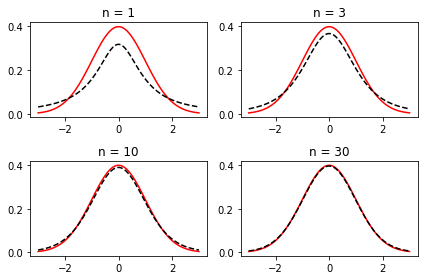

In [116]:
plt.figure()
x = np.linspace(-3, 3, 100)
for subplot_index, degrees_of_freedom in zip([1, 2, 3, 4], [1, 3, 10, 30]):
    plt.subplot(2, 2, subplot_index)
    y_n = st.norm.pdf(x)
    y_t = st.t.pdf(x, degrees_of_freedom)
    plt.title("n = {}".format(degrees_of_freedom))
    plt.plot(x, y_n, "r-", label="Normal")
    plt.plot(x, y_t, "k--", label="Student's t")
plt.tight_layout()
plt.show()

If the model didn't provide an estimate on the population standard deviation ($\sigma$) or, there are reasons to believe that it is not reflected in the data (e.g. the model does not account for distance and photometry uncertainties)... then we may chose to test the consistency of the mean values without using $\sigma$.

In the following cell, we apply the t-test to test the hypothesis the the mean absolute magnitude of the Milky Way GCs is consistent with the mean value that the model predicts, forgetting about the prediction on the standard deviation. 

In [89]:
statistic, pvalue = st.ttest_1samp(absolute_MWG, model_mean)
print("Statistic = {:.3g}".format(statistic))
print("p-value   = {:.3g}".format(pvalue))

Statistic = -1.61
p-value   = 0.11


### 3.2. Two-sample $t$-test

> Do indpendent samples $A$ and $B$ have the same expected value?

The function `ttest_1samp` that we used in the previous example, performs the *one sample* $t$-test, meaning that we test whether the mean of one sample is consistent with a specific value.

In the case we want to test whether two samples' means are consistent, we may use the *two sample* $t$-test which is provided by `scipy.stats` function `ttest_ind` computes the standard 2-sample t-test. Though it **assumes** that the variance of the two populations is equal. If not, then we use the argument `equal_var`: if set to `False` then the Welch's t-test is used.

Imagine the case where the Milky Way GC data was collected by two independent surveys producing two samples A and B. In the cell below, we simulate this scenario by dividing the data randomly into two sets:

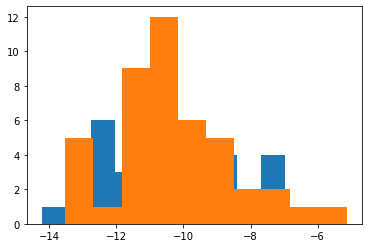

p-value   = 0.865


In [117]:
# split the Milky Way sample randomly into two sets
half = np.random.rand(N_MWG) < 0.5
sample_A = absolute_MWG[half]
sample_B = absolute_MWG[~half]
plt.figure()
plt.hist(sample_A, bins=10)
plt.hist(sample_B, bins=10)
plt.show()


equal_variances = True
statistic, pvalue = st.ttest_ind(sample_A, sample_B, equal_var=equal_variances)
print("p-value   = {:.3g}".format(pvalue))

### 3.3. Distributions: Shapiro-Wilk test for normality

Whether we want to
- verify a model's usage (or derivation) of the normal distribution
- justify the normal distribution assumption in subsequent analysis (e.g. other hypothesis tests)
we can test whether the data follows a normal distribution or not.

The Shapiro-Wilk test can be used in the MW data:

In [118]:
statistic, pvalue = st.shapiro(absolute_MWG)
print("p-value   = {:.3g}".format(pvalue))

p-value   = 0.675


### 3.4. Distributions: Kolmogorov-Smirnov test

What if the distribution we want to test is not analytical or there is no statistical test designed for it? In this case, we need a **non-parametric** test. The Kolmogorov-Smirnov (K-S) test is commonly used for such cases and it is based on the idea that if the distributions are significantly different, then their CDFs will deviate and the maximum distance between them can be used to quantify the disagreement:

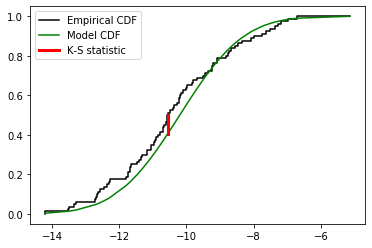

In [119]:
sample = absolute_MWG
x_sample = np.sort(sample)
y_sample = np.arange(0, len(sample)) / (len(sample) - 1.0)
#x_model = np.linspace(x_sample[0], x_sample[-1], 200)
y_model = st.norm.cdf(x_sample, loc=model_mean, scale=model_std)

index = np.argmax((y_sample - y_model) ** 2.0)

plt.figure()
plt.step(x_sample, y_sample, "k-", label="Empirical CDF")
plt.plot(x_sample, y_model, "g-", label="Model CDF")
plt.plot([x_sample[index]] * 2, [y_sample[index], y_model[index]], "r", lw=3, label="K-S statistic")
#plt.annotate(s='', xy=(1,1), xytext=(0,0), arrowprops=dict(arrowstyle='<->'))
plt.legend()
plt.show()

In [120]:
sample = absolute_MWG
model_distribution = st.norm(loc=model_mean, scale=model_std)
statistic, pvalue = st.kstest(sample, model_distribution.cdf)
print("Statistic = {:.3g}".format(statistic))
print("p-value   = {:.3g}".format(pvalue))

Statistic = 0.1
p-value   = 0.368


### 3.4. Testing for correlations

TODO: intro

TODO: add comparison... pros and cons...

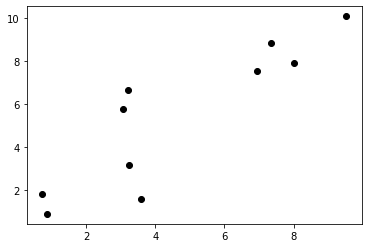

PEARSON  : R =    0.887  |  p-value = 0.000631
SPEARMAN : R =    0.806  |  p-value =  0.00486
KENDALL  : R =    0.644  |  p-value =  0.00915


In [121]:
N = 10
x = np.random.uniform(0, 10, size=N)
a = 1
b = 0
error = 3
y = a * x + b + np.random.normal(loc=0, scale=error, size=N)
plt.figure()
plt.plot(x, y, "ko")
plt.show()

r, pvalue = st.pearsonr(x, y)
print("PEARSON  : R = {:8.3g}  |  p-value = {:8.3g}".format(r, pvalue))

r, pvalue = st.spearmanr(x, y)
print("SPEARMAN : R = {:8.3g}  |  p-value = {:8.3g}".format(r, pvalue))

r, pvalue = st.kendalltau(x, y)
print("KENDALL  : R = {:8.3g}  |  p-value = {:8.3g}".format(r, pvalue))

### References

[1] Nantais et al. (2006). Nearby Spiral Globular Cluster Systems. I. Luminosity Functions. The Astronomical Journal, 131.